In [1]:
#Import libraries
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from tqdm import trange, tqdm
import pickle
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns

py.sign_in("XcodeburpX", "MSAJPAmW4yjvaxgLM1DC") # You can change if you have account in PlotLy

from hackathon.utils.utils import *

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (5, 5)

%load_ext autoreload
%autoreload 2

/home/kinshiryuu-burp/anaconda3/envs/nitinol/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.



In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
import cufflinks as cf

In [4]:
init_notebook_mode(connected=True)

In [5]:
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [6]:
power = pd.read_csv("../data/hackathon/power--2014-01-01_2015-01-01.csv", index_col=0)

In [7]:
power.head()

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
ut_ms,,,,,,,,,,,,,,,,,,,,,
1388534410697,0.001457,0.001474,0.177440,0.005015,0.000714,0.006247,0.000554,0.001827,0.424989,0.005028,...,0.000996,0.001474,0.002123,0.005547,0.069760,0.000602,0.000598,0.000714,0.006457,0.003227
1388534442708,0.001821,0.001474,0.177440,0.006019,0.000714,0.001001,0.000554,0.001827,0.430256,0.005028,...,0.000996,0.001474,0.002123,0.005547,0.647788,0.000602,0.000499,0.000714,0.007748,0.003227
1388534474708,0.001821,0.001474,0.172173,0.006019,0.000714,0.001001,0.000554,0.001827,0.430256,0.005028,...,0.000996,0.001474,0.002389,0.005547,0.647788,0.000501,0.000499,0.000714,0.007748,0.003227
1388534506695,0.001821,0.001474,0.177440,0.006019,0.000714,0.001001,0.000554,0.001827,0.430256,0.005028,...,0.000996,0.001474,0.002389,0.005547,0.647788,0.000501,0.000499,0.000714,0.007748,0.003227
1388534538697,0.001821,0.001474,0.177440,0.005015,0.000857,0.001001,0.000554,0.001827,0.430256,0.005028,...,0.000996,0.001474,0.002389,0.005547,0.627856,0.000501,0.000499,0.000714,0.007748,0.003227


In [8]:
power_df = load_dataframe("../data/hackathon/power--2014-01-01_2015-01-01.csv")
power_df.head()

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
ut_ms,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.159530,0.001500,0.174177,0.943549,0.000722,0.001632,0.000560,0.001843,0.247678,0.005081,...,0.001056,0.001505,0.100261,0.005694,0.291129,0.000520,0.000514,0.000727,0.006605,0.003302
2014-01-01 01:00:00,0.121151,0.001521,0.175512,0.604849,0.000744,0.001924,0.000563,0.001886,0.185319,0.005126,...,0.001206,0.001534,0.067925,0.005815,0.324071,0.000526,0.000523,0.000744,0.554567,0.003395
2014-01-01 02:00:00,0.113486,0.001529,0.175482,1.041955,0.000753,0.002059,0.000566,0.001918,0.176361,0.005259,...,0.001303,0.001544,0.142277,0.005891,0.618507,0.000533,0.000528,0.000760,0.720290,0.003450
2014-01-01 03:00:00,0.068283,0.001534,0.175418,1.049898,0.000742,0.001457,0.000570,0.001892,0.101729,0.005162,...,0.001201,0.001524,0.201844,0.005696,0.366783,0.000532,0.000522,0.000753,0.707278,0.003389
2014-01-01 04:00:00,0.080841,0.001474,0.175622,0.618112,0.000714,0.001326,0.000554,0.001830,0.138633,0.005046,...,0.000963,0.001490,0.002255,0.005616,0.247031,0.000510,0.000505,0.000726,0.006514,0.003279


In [9]:
names = power_df.columns.values

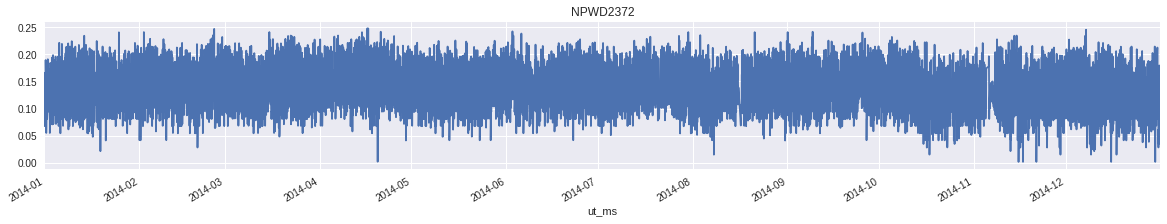

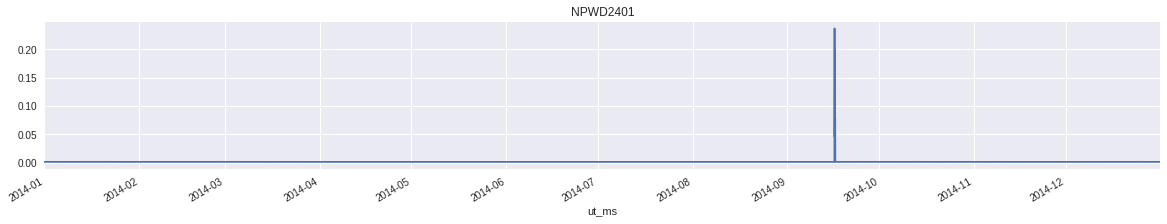

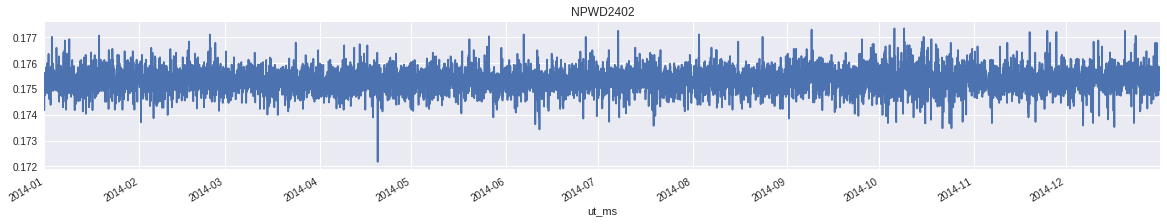

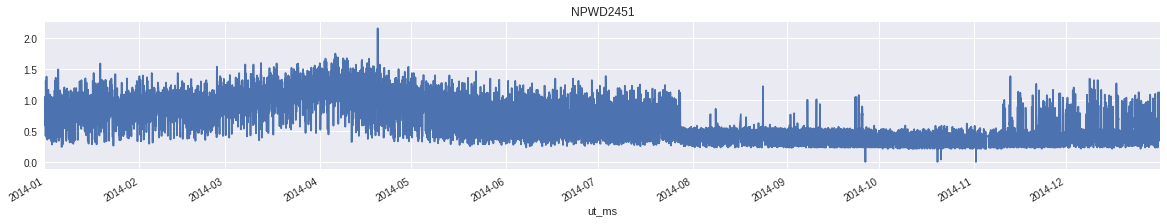

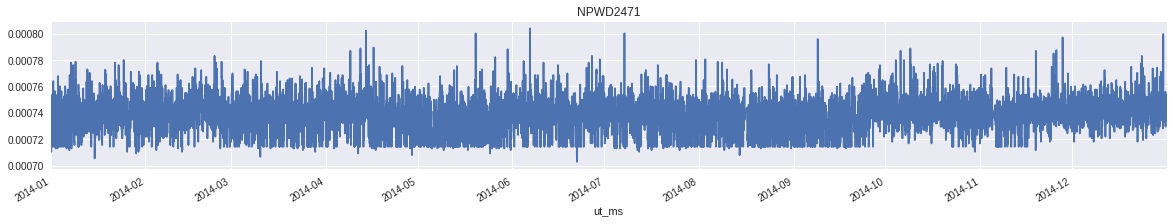

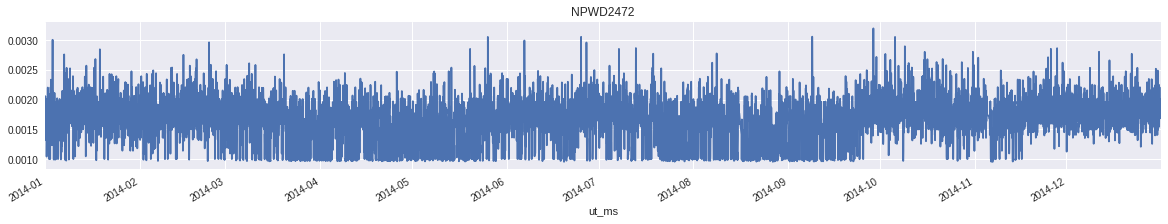

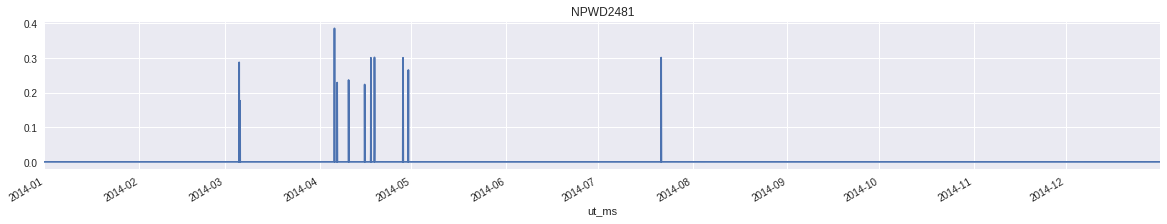

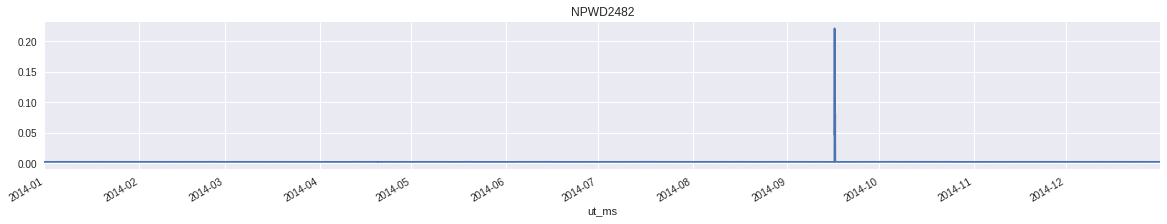

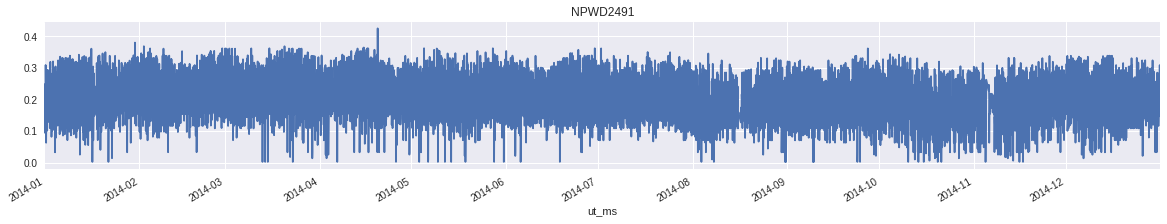

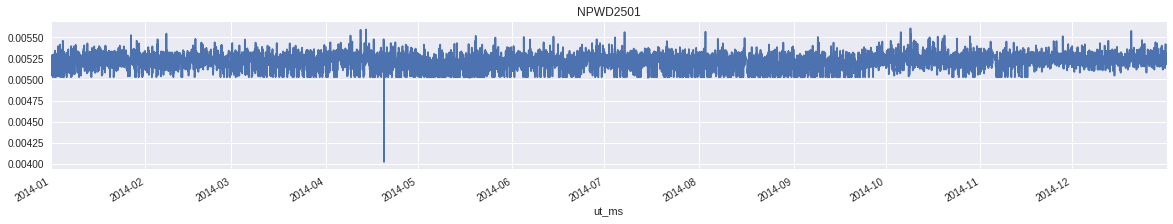

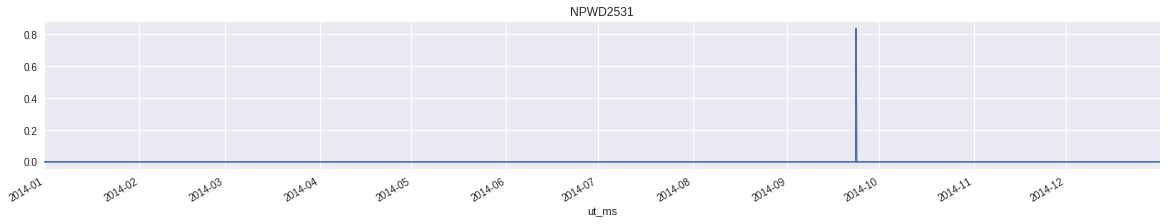

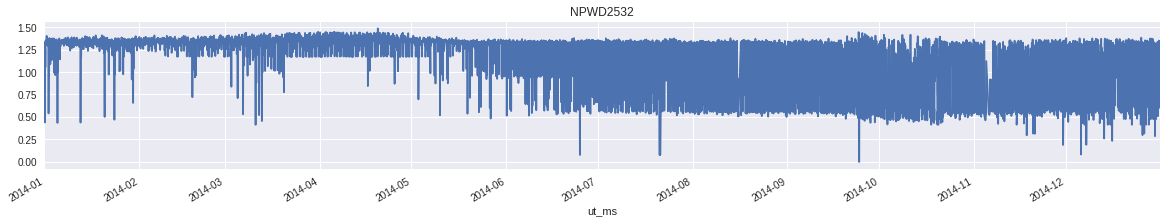

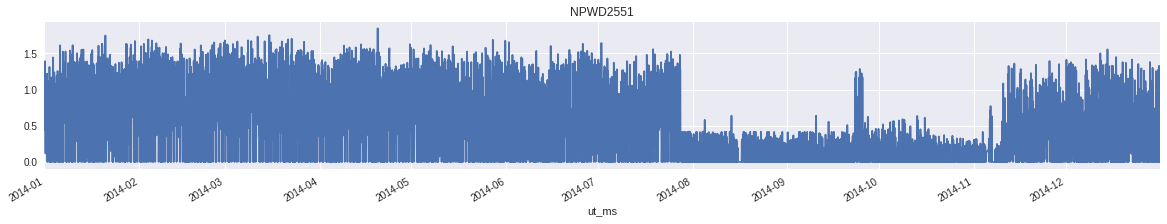

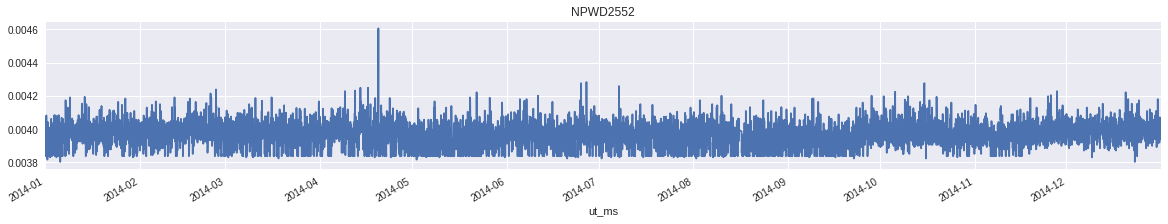

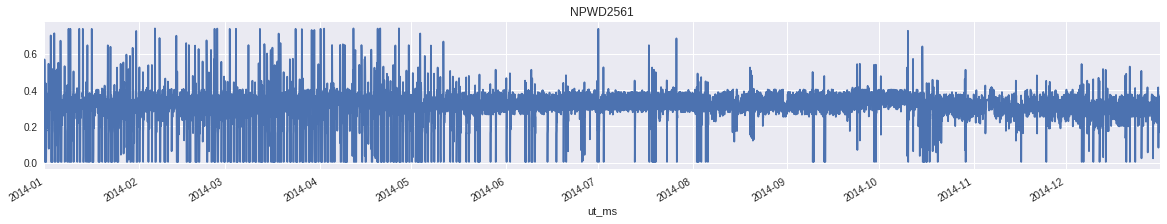

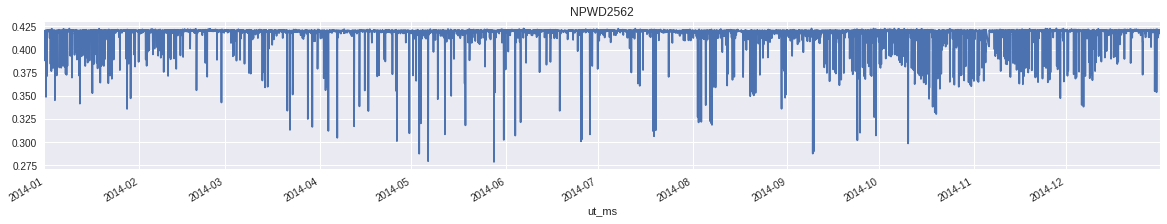

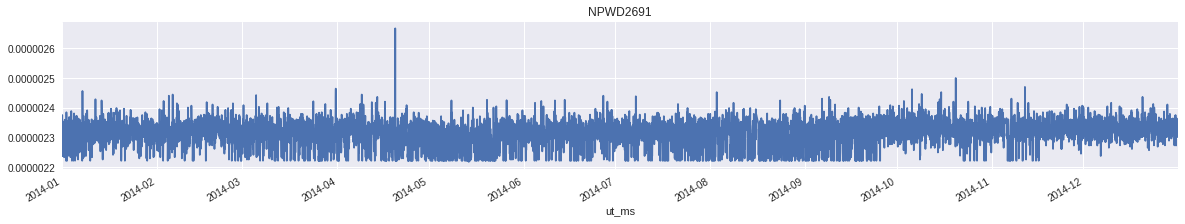

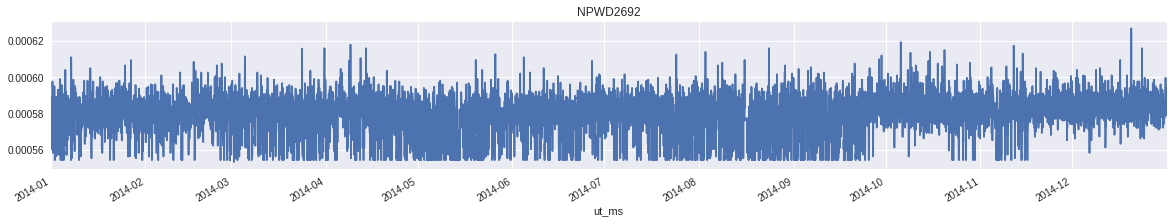

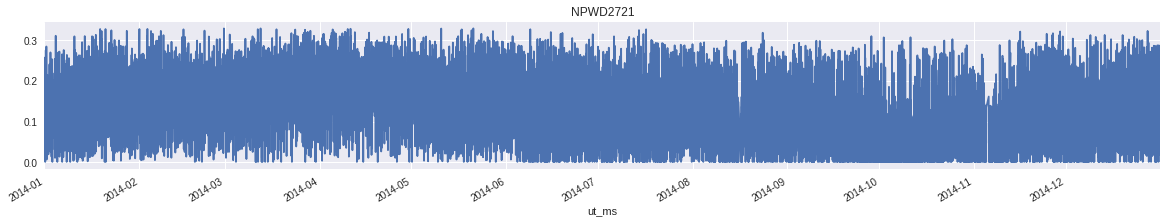

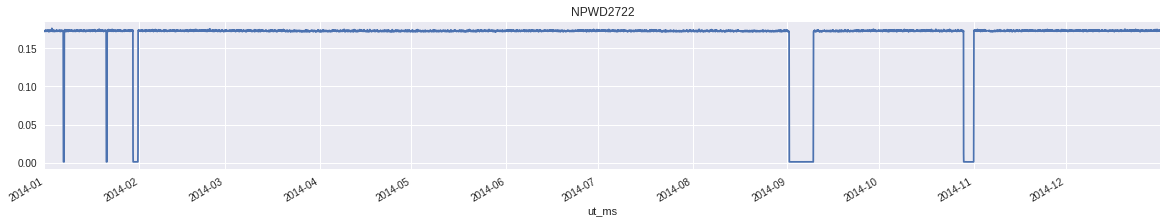

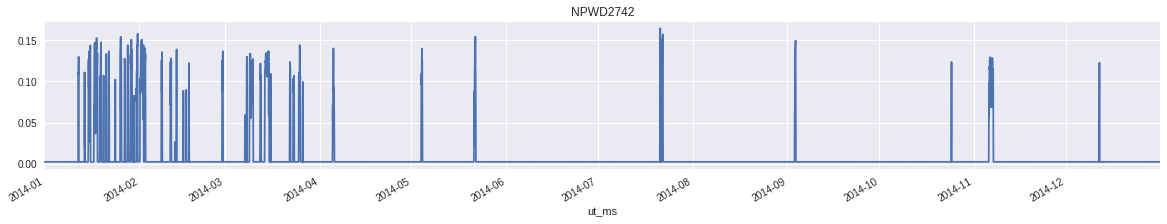

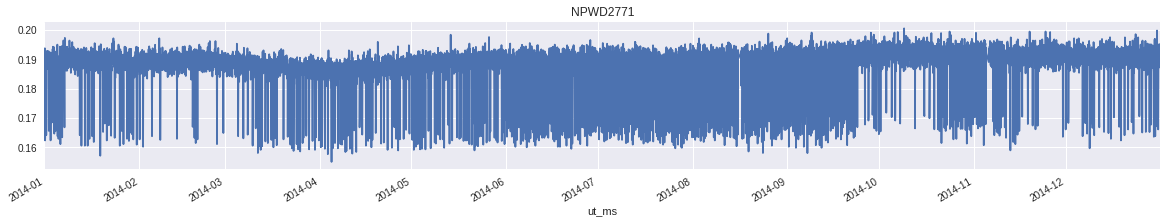

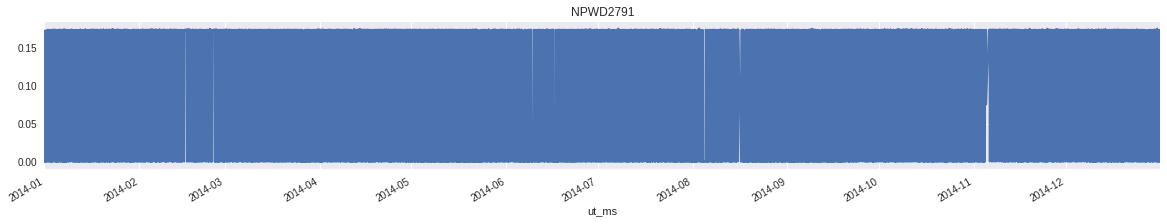

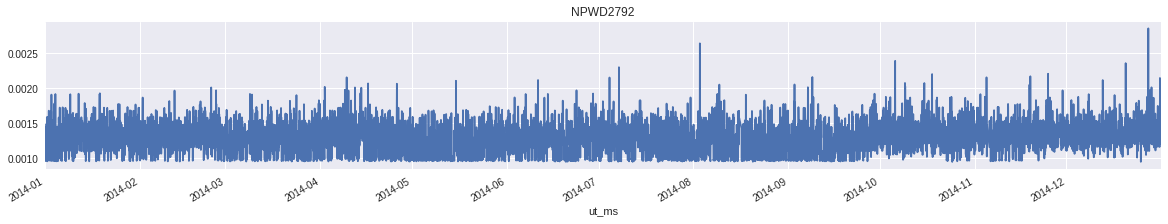

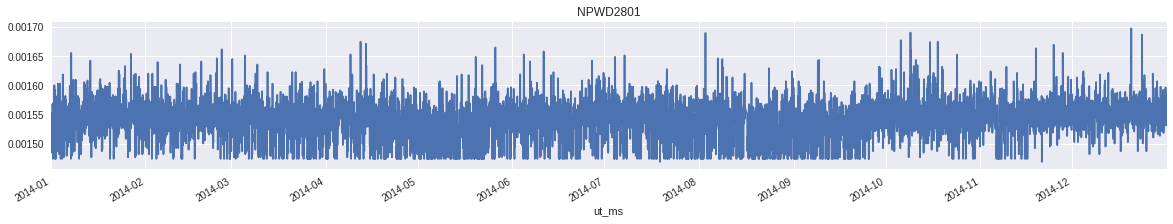

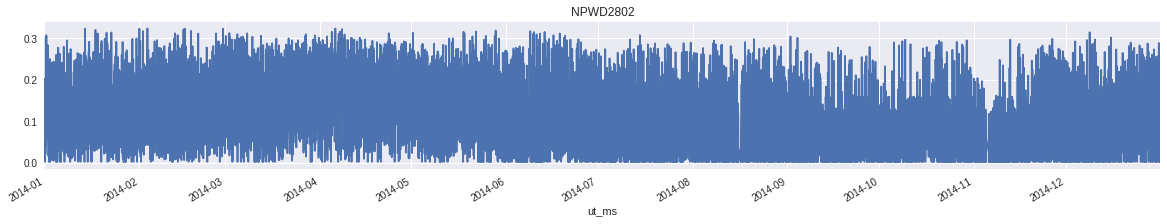

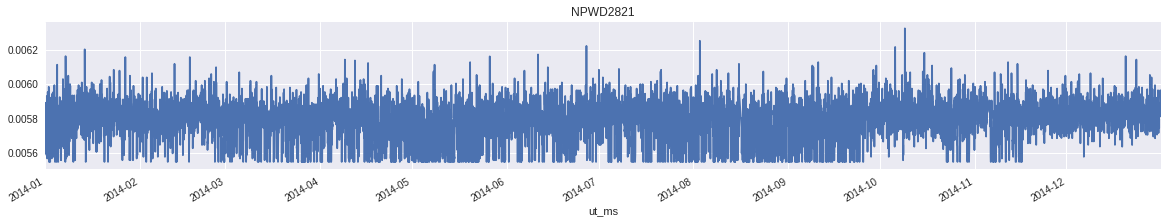

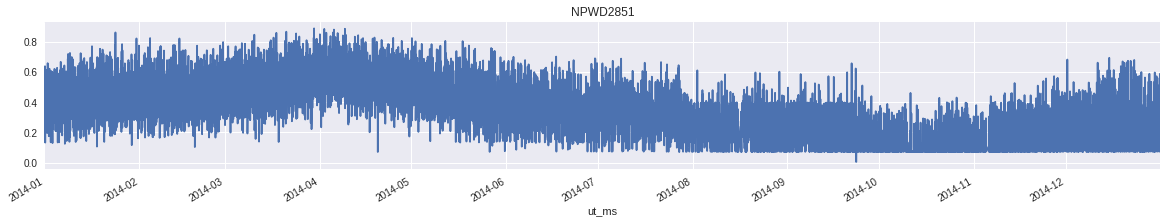

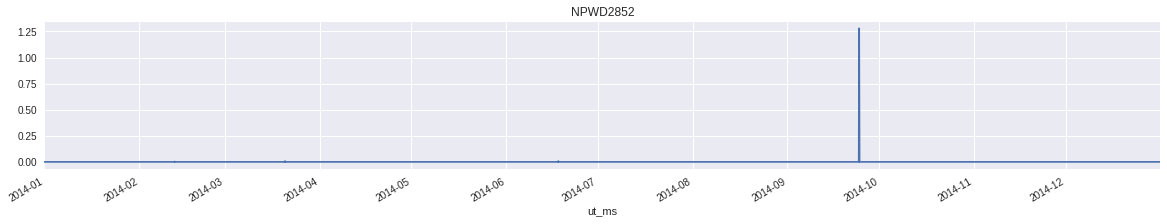

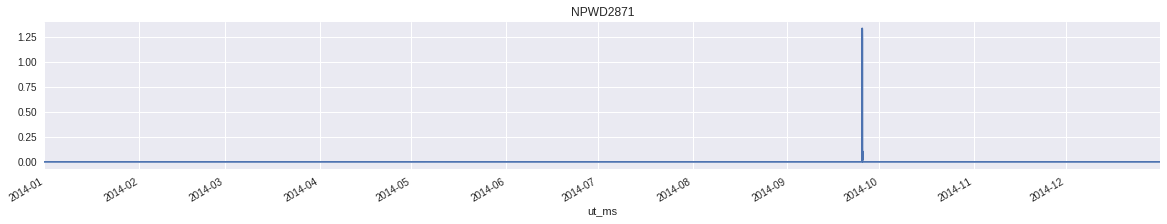

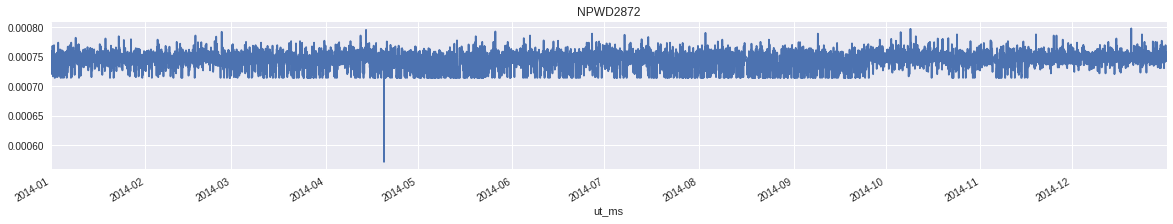

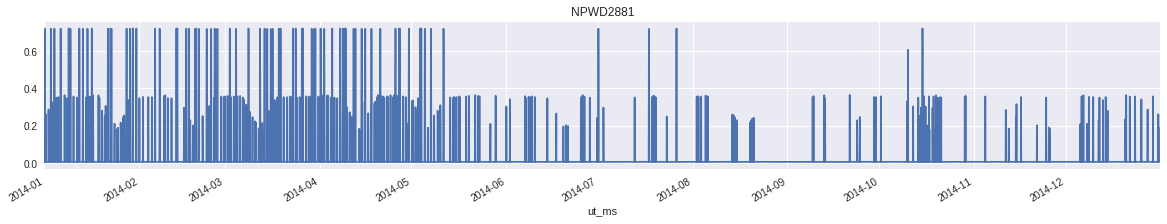

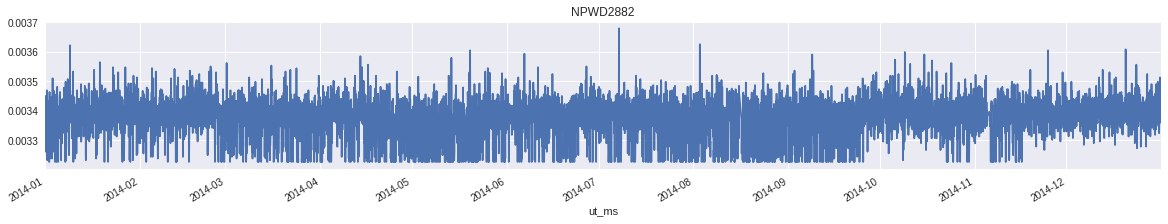

In [11]:
#Plot for NPWD power data
for i, name in enumerate(names):
    plt.figure(num=i,figsize=(20, 3))
    power_df[name].plot()
    plt.title(name)

In [12]:
power_df.describe()

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
count,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,...,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000
mean,0.129786,0.001605,0.175343,0.665883,0.000738,0.001653,0.001140,0.001969,0.192130,0.005212,...,0.001286,0.001540,0.108539,0.005788,0.333435,0.001006,0.000830,0.000745,0.032509,0.003372
std,0.042633,0.003601,0.000436,0.332843,0.000013,0.000372,0.011551,0.003500,0.069319,0.000093,...,0.000213,0.000032,0.080589,0.000113,0.189534,0.022622,0.019446,0.000014,0.111239,0.000067
min,0.001821,0.001463,0.172173,0.005122,0.000703,0.000953,0.000552,0.001824,0.002016,0.004022,...,0.000951,0.001469,0.002123,0.005547,0.005202,0.000501,0.000498,0.000571,0.006457,0.003227
25%,0.097026,0.001508,0.175089,0.393803,0.000731,0.001444,0.000565,0.001876,0.153378,0.005161,...,0.001125,0.001521,0.042595,0.005726,0.169509,0.000519,0.000515,0.000737,0.006685,0.003337
50%,0.120904,0.001527,0.175343,0.547415,0.000740,0.001699,0.000571,0.001901,0.181572,0.005223,...,0.001296,0.001544,0.098999,0.005805,0.327096,0.000527,0.000523,0.000747,0.006768,0.003383
75%,0.162790,0.001544,0.175606,0.943895,0.000746,0.001913,0.000577,0.001918,0.244439,0.005270,...,0.001437,0.001560,0.158980,0.005861,0.458922,0.000532,0.000528,0.000753,0.006837,0.003416
max,0.247601,0.236656,0.177347,2.155600,0.000804,0.003200,0.385761,0.221284,0.424989,0.005606,...,0.002853,0.001698,0.324318,0.006323,0.888040,1.278986,1.333615,0.000798,0.721845,0.003679


In [44]:
trace = go.Heatmap(z=power_df.corr().as_matrix(),x=power_df.columns.values,
                  y=power_df.columns.values)

In [46]:
#Interactive Heatmap
data = [trace]
py.iplot(data, filename='power_heatmap')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~XcodeburpX/0 or inside your plot.ly account where it is named 'power_heatmap'


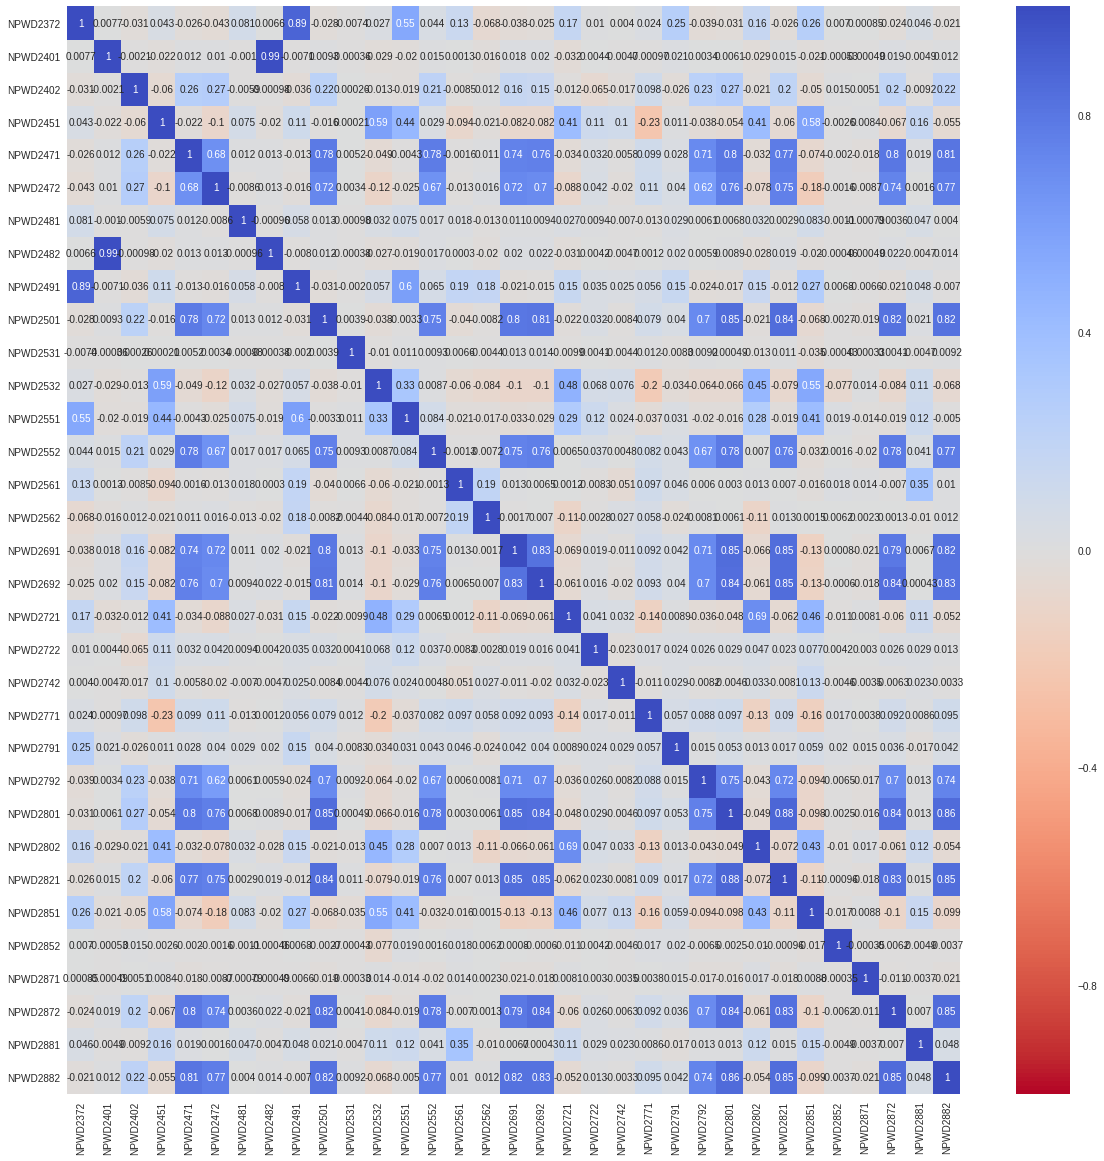

In [48]:
#Seaborn Heatmap for NPWD
plt.figure(figsize=(20,20))
sns.heatmap(power_df.corr(), cmap='coolwarm_r', annot=True)

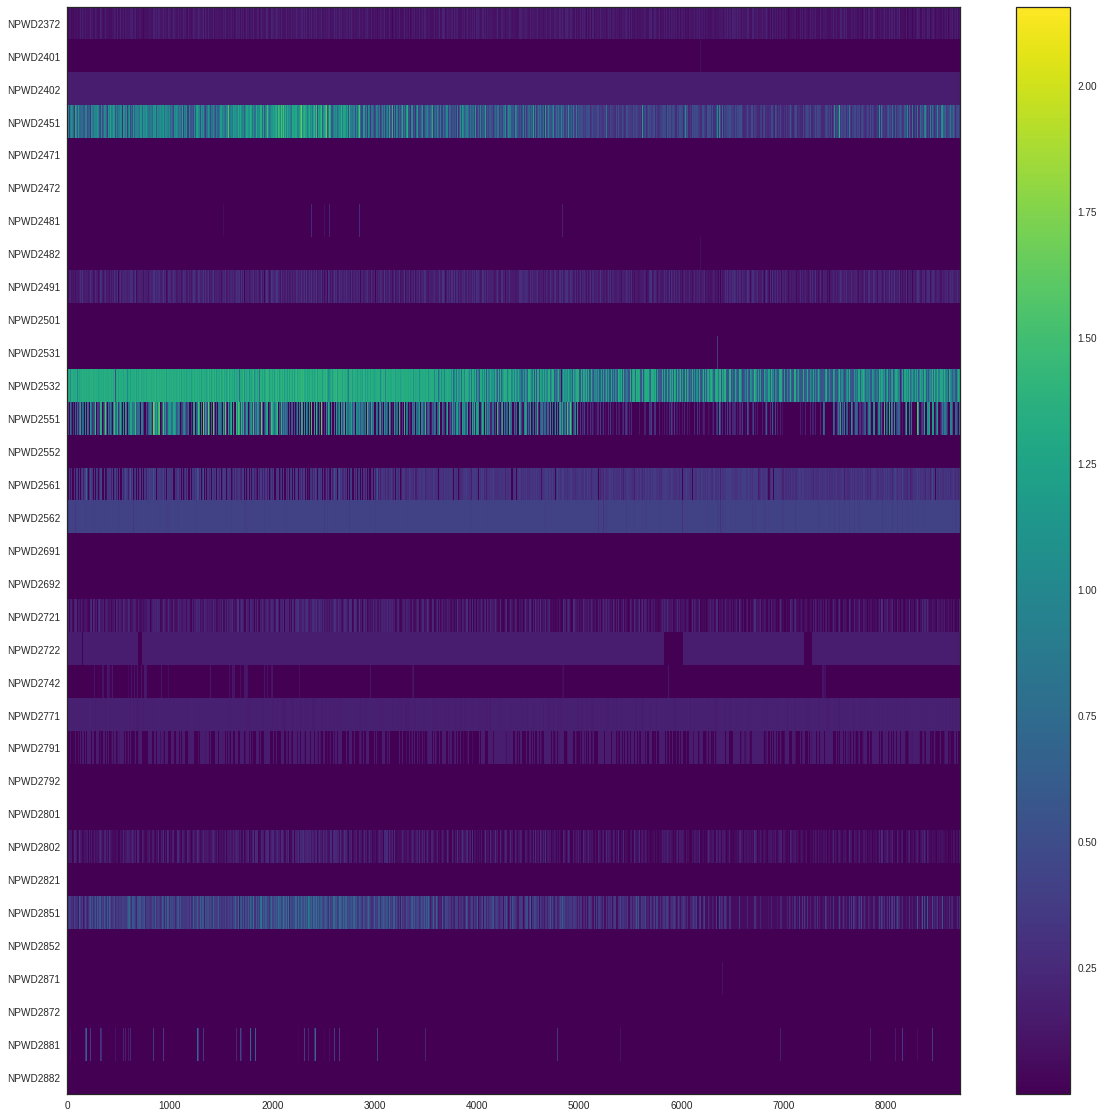

In [50]:
sns.set_style('white')
plt.figure(figsize=(20,20))
power_data = power_df.values.T
plt.imshow(power_data, aspect='auto', interpolation='nearest', cmap='viridis')
plt.yticks(xrange(len(power_df.columns.values)), power_df.columns.values)
plt.colorbar()


In [52]:
saaf_raw = pd.read_csv("../data/hackathon/context--2014-01-01_2015-01-01--saaf.csv", 
                       index_col=0)

In [54]:
saaf_raw.head()

,sa,sx,sy,sz
ut_ms,,,,
1388534455000,12.25,42.80,90.0,132.80
1388534459000,12.34,42.76,90.0,132.76
1388534515000,11.77,42.31,90.0,132.31
1388534519000,11.86,42.27,90.0,132.27
1388534575000,11.29,41.83,90.0,131.83


In [56]:
saad_df = load_dataframe("../data/hackathon/context--2014-01-01_2015-01-01--saaf.csv")

In [58]:
saad_df.head()

,sa,sx,sy,sz
ut_ms,,,,
2014-01-01 00:00:00,6.003000,30.058917,90.000000,120.058917
2014-01-01 01:00:00,8.751892,21.132432,89.998514,111.132432
2014-01-01 02:00:00,2.335902,13.328525,89.998197,103.328525
2014-01-01 03:00:00,5.060000,29.074912,89.994386,119.074912
2014-01-01 05:00:00,9.049074,41.438889,86.696111,129.694444


In [60]:
sa_names = saad_df.columns.values

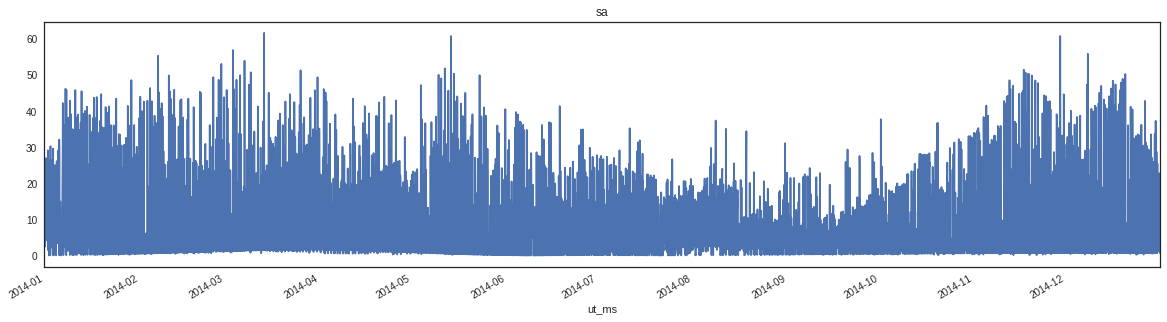

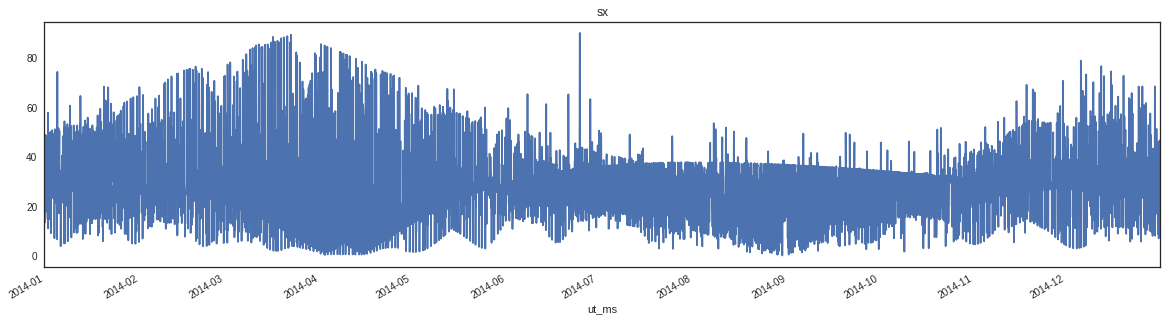

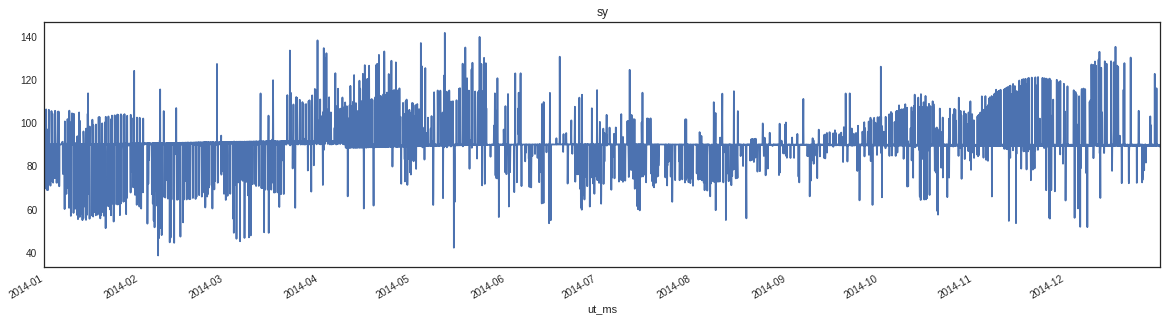

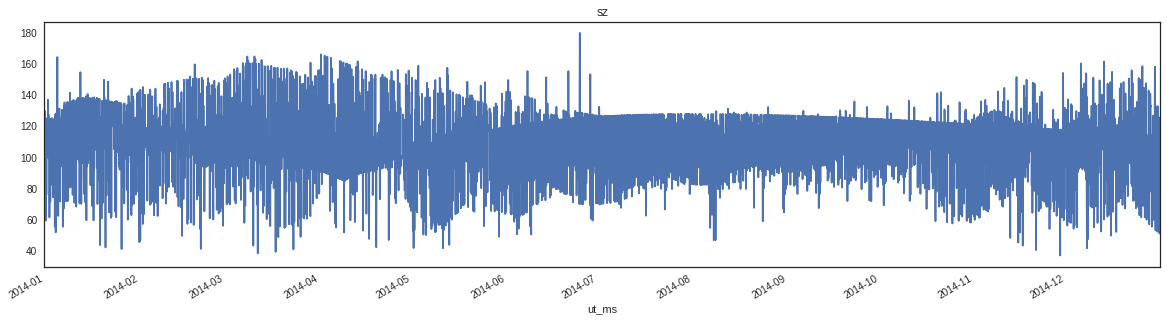

In [62]:
#Plot for sa, sx, sy, sz
for i, name in enumerate(sa_names):
    plt.figure(num=i,figsize=(20,5))
    saad_df[name].plot()
    plt.title(name)

In [64]:
saad_df.describe()

,sa,sx,sy,sz
count,8135.000000,8135.000000,8135.000000,8135.000000
mean,8.123868,27.273342,89.899322,109.455304
std,10.016774,14.505624,8.220058,18.728085
min,0.000000,0.133679,38.473810,36.738500
25%,0.995000,17.224747,89.435682,97.908964
50%,3.554038,27.110667,89.957500,112.852500
75%,12.232667,34.706417,90.287260,121.650389
max,61.677667,90.126000,141.832500,179.889167


In [66]:
saad_df.corr()

,sa,sx,sy,sz
sa,1.000000,0.498319,0.032677,-0.208217
sx,0.498319,1.000000,0.035930,0.547767
sy,0.032677,0.035930,1.000000,-0.035326
sz,-0.208217,0.547767,-0.035326,1.000000


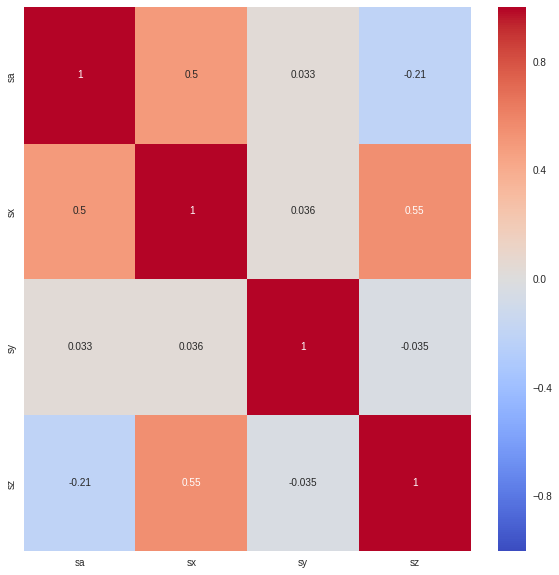

In [68]:
#Correlation map for sa,sx,sy,sz
plt.figure(figsize=(10,10))
sns.heatmap(saad_df.corr(), annot=True, cmap='coolwarm')

In [70]:
power_df.describe()

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
count,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,...,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000
mean,0.129786,0.001605,0.175343,0.665883,0.000738,0.001653,0.001140,0.001969,0.192130,0.005212,...,0.001286,0.001540,0.108539,0.005788,0.333435,0.001006,0.000830,0.000745,0.032509,0.003372
std,0.042633,0.003601,0.000436,0.332843,0.000013,0.000372,0.011551,0.003500,0.069319,0.000093,...,0.000213,0.000032,0.080589,0.000113,0.189534,0.022622,0.019446,0.000014,0.111239,0.000067
min,0.001821,0.001463,0.172173,0.005122,0.000703,0.000953,0.000552,0.001824,0.002016,0.004022,...,0.000951,0.001469,0.002123,0.005547,0.005202,0.000501,0.000498,0.000571,0.006457,0.003227
25%,0.097026,0.001508,0.175089,0.393803,0.000731,0.001444,0.000565,0.001876,0.153378,0.005161,...,0.001125,0.001521,0.042595,0.005726,0.169509,0.000519,0.000515,0.000737,0.006685,0.003337
50%,0.120904,0.001527,0.175343,0.547415,0.000740,0.001699,0.000571,0.001901,0.181572,0.005223,...,0.001296,0.001544,0.098999,0.005805,0.327096,0.000527,0.000523,0.000747,0.006768,0.003383
75%,0.162790,0.001544,0.175606,0.943895,0.000746,0.001913,0.000577,0.001918,0.244439,0.005270,...,0.001437,0.001560,0.158980,0.005861,0.458922,0.000532,0.000528,0.000753,0.006837,0.003416
max,0.247601,0.236656,0.177347,2.155600,0.000804,0.003200,0.385761,0.221284,0.424989,0.005606,...,0.002853,0.001698,0.324318,0.006323,0.888040,1.278986,1.333615,0.000798,0.721845,0.003679


In [72]:
power.shape

(980322, 33)

In [74]:
saaf_raw.shape

(498806, 4)

In [76]:
saad_df.head()

,sa,sx,sy,sz
ut_ms,,,,
2014-01-01 00:00:00,6.003000,30.058917,90.000000,120.058917
2014-01-01 01:00:00,8.751892,21.132432,89.998514,111.132432
2014-01-01 02:00:00,2.335902,13.328525,89.998197,103.328525
2014-01-01 03:00:00,5.060000,29.074912,89.994386,119.074912
2014-01-01 05:00:00,9.049074,41.438889,86.696111,129.694444


In [78]:
power_df.head()

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
ut_ms,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0.159530,0.001500,0.174177,0.943549,0.000722,0.001632,0.000560,0.001843,0.247678,0.005081,...,0.001056,0.001505,0.100261,0.005694,0.291129,0.000520,0.000514,0.000727,0.006605,0.003302
2014-01-01 01:00:00,0.121151,0.001521,0.175512,0.604849,0.000744,0.001924,0.000563,0.001886,0.185319,0.005126,...,0.001206,0.001534,0.067925,0.005815,0.324071,0.000526,0.000523,0.000744,0.554567,0.003395
2014-01-01 02:00:00,0.113486,0.001529,0.175482,1.041955,0.000753,0.002059,0.000566,0.001918,0.176361,0.005259,...,0.001303,0.001544,0.142277,0.005891,0.618507,0.000533,0.000528,0.000760,0.720290,0.003450
2014-01-01 03:00:00,0.068283,0.001534,0.175418,1.049898,0.000742,0.001457,0.000570,0.001892,0.101729,0.005162,...,0.001201,0.001524,0.201844,0.005696,0.366783,0.000532,0.000522,0.000753,0.707278,0.003389
2014-01-01 04:00:00,0.080841,0.001474,0.175622,0.618112,0.000714,0.001326,0.000554,0.001830,0.138633,0.005046,...,0.000963,0.001490,0.002255,0.005616,0.247031,0.000510,0.000505,0.000726,0.006514,0.003279


In [80]:
dmop_raw = pd.read_csv("../data/hackathon/context--2014-01-01_2015-01-01--dmop.csv", index_col=0)

In [82]:
dmop_raw.head()

,subsystem
ut_ms,
1388536106000,AAAAF40C0
1388538814000,AACFE91A
1388538822000,ATTTF321P
1388538877000,AACFM06A
1388538878000,AACFE03A


In [84]:
import hackathon.preprocessing.simple_dmop_parser as dmop_parser

In [86]:
import os

In [88]:
#os.makedirs("../data/hackathon/2014_2015_24h_dmop")

In [89]:
dmop_parser.simple_parser(data_path="../data/hackathon/context--2014-01-01_2015-01-01--dmop.csv", 
                          dst_data_path="../data/hackathon/2014_2015_24h_dmop/")

Running simple dmop parser
Generating dmop counts:24h
Done.


In [90]:
dmop_24h_df = load_dataframe("../data/hackathon/2014_2015_24h_dmop/simple_dmop_24h.csv")

In [91]:
dmop_24h_df.head()

,dmop_count_24h_AAAA,dmop_count_24h_AACF,dmop_count_24h_AHHH,dmop_count_24h_AMMM,dmop_count_24h_AOOO,dmop_count_24h_APSF,dmop_count_24h_ASSS,dmop_count_24h_ASXX,dmop_count_24h_ATMB,dmop_count_24h_ATTT,dmop_count_24h_AVVV,dmop_count_24h_AXXX,dmop_count_24h_sum
ut_ms,,,,,,,,,,,,,
2014-01-01,14.0,127.0,43.0,34.0,23.0,35.0,6.0,0.0,3.0,21.0,0.0,0.0,306.0
2014-01-02,13.0,106.0,0.0,45.0,12.0,27.0,14.0,6.0,2.0,18.0,0.0,4.0,247.0
2014-01-03,19.0,113.0,30.0,37.0,23.0,34.0,3.0,0.0,3.0,18.0,0.0,0.0,280.0
2014-01-04,16.0,98.0,22.0,30.0,18.0,35.0,15.0,0.0,4.0,24.0,0.0,0.0,262.0
2014-01-05,14.0,126.0,22.0,44.0,23.0,34.0,9.0,0.0,3.0,22.0,0.0,0.0,297.0


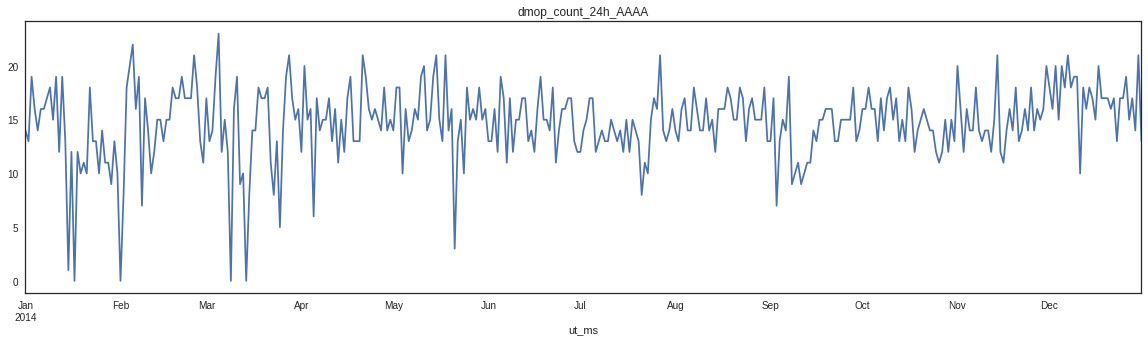

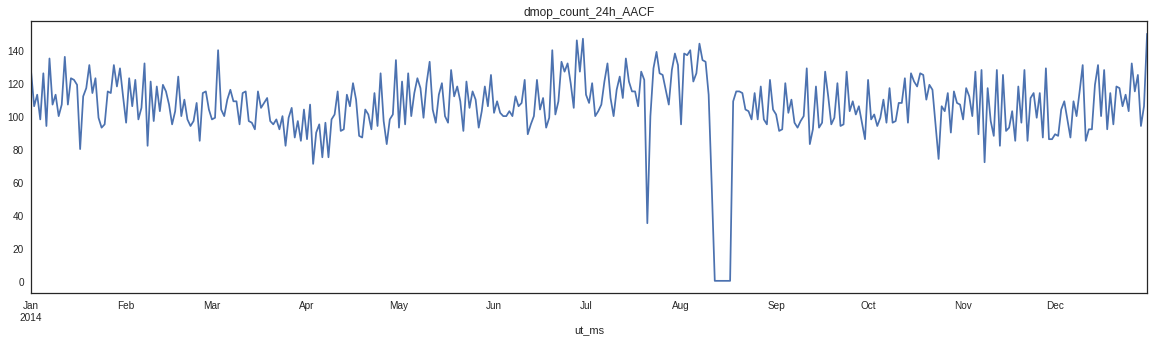

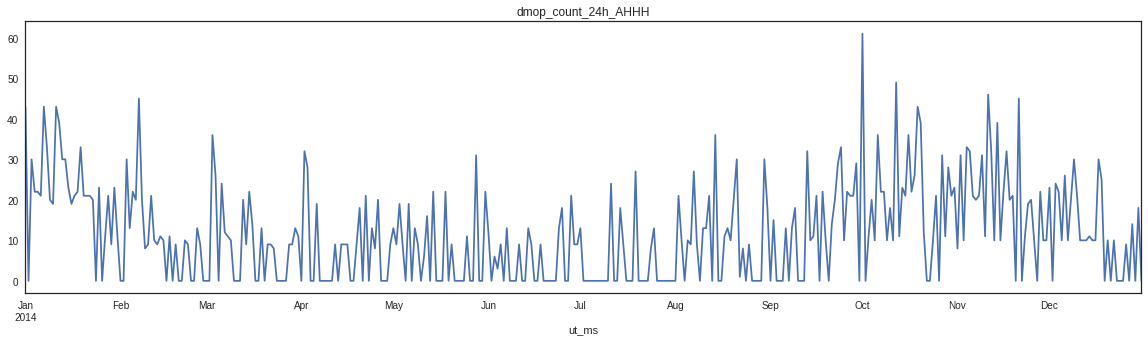

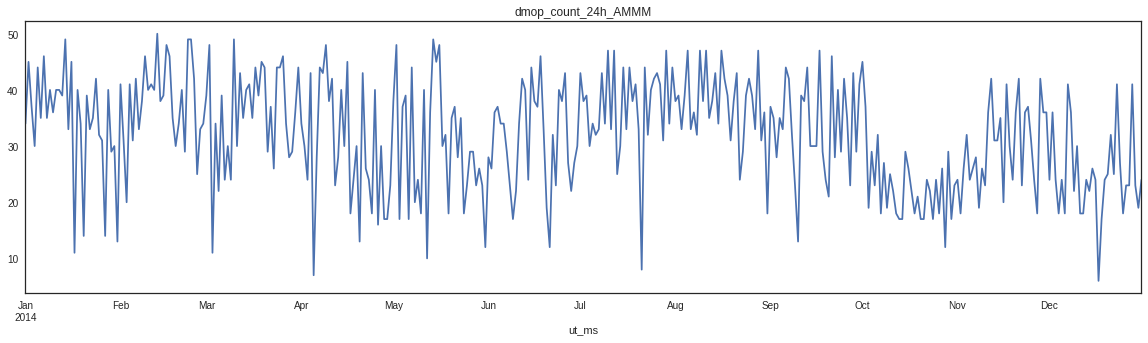

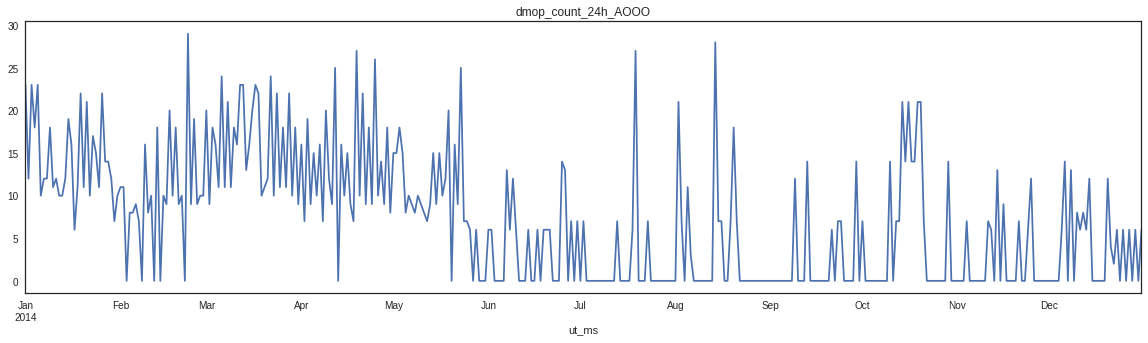

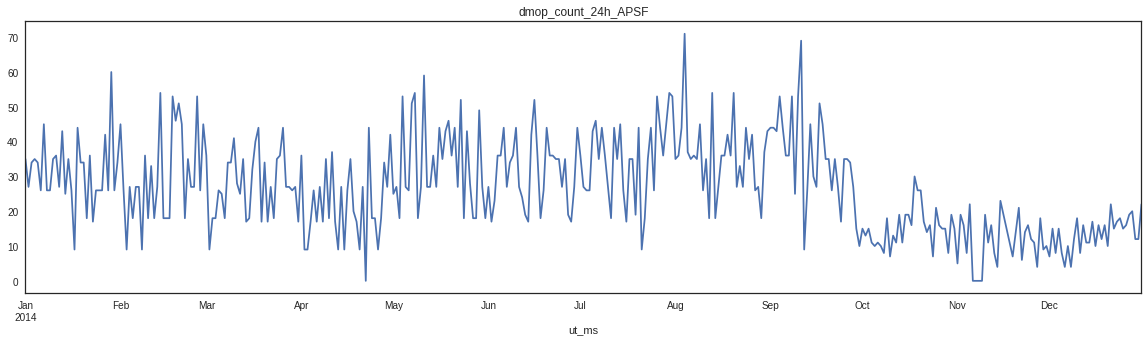

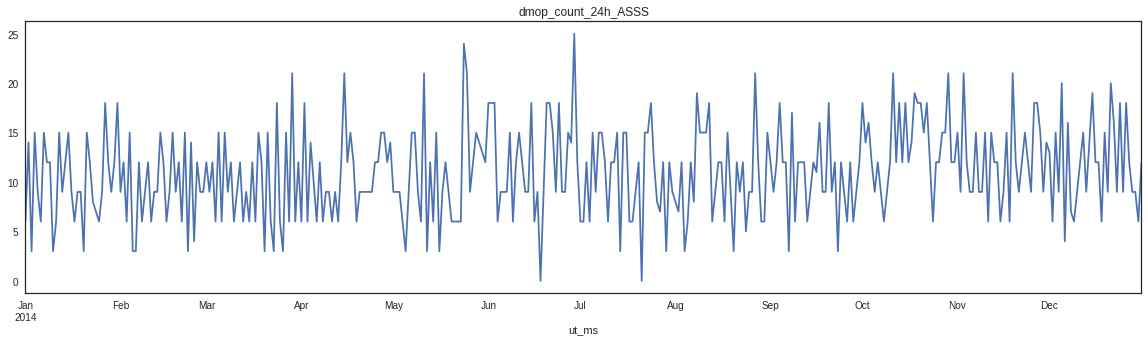

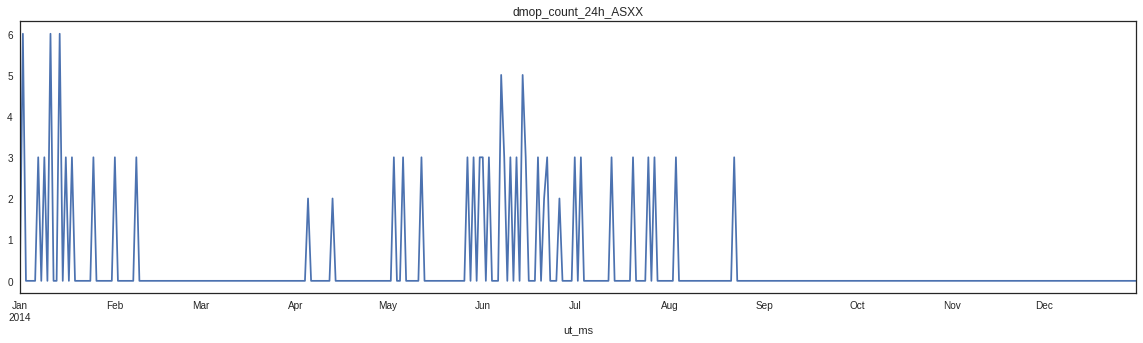

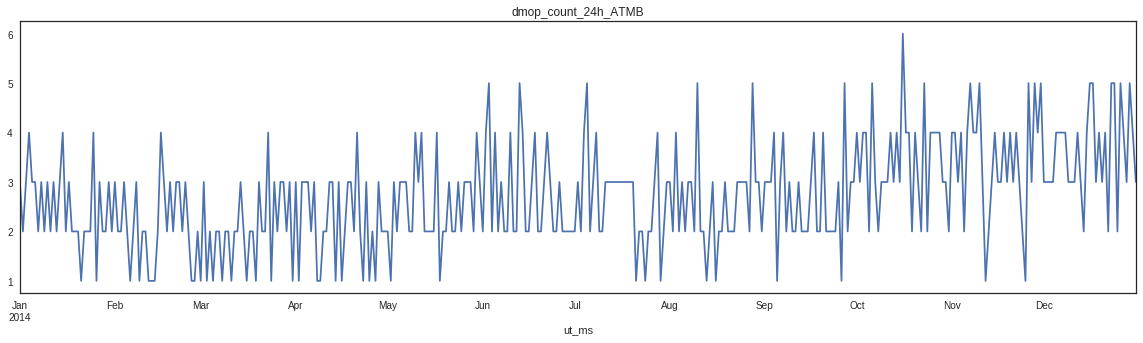

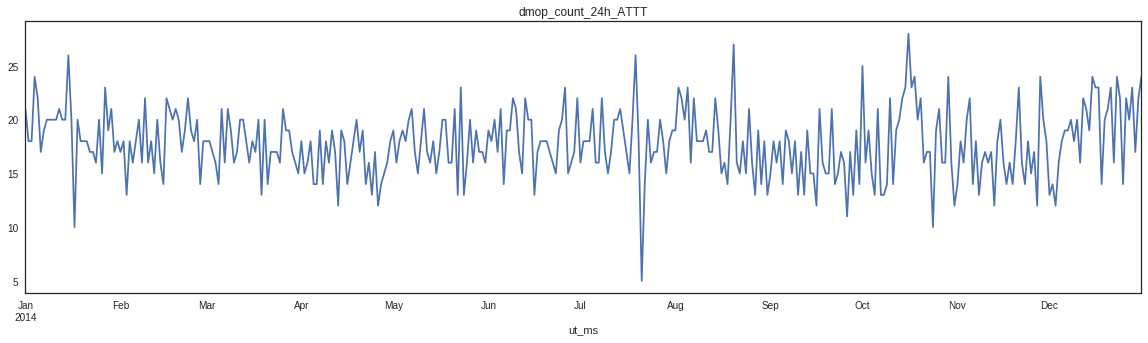

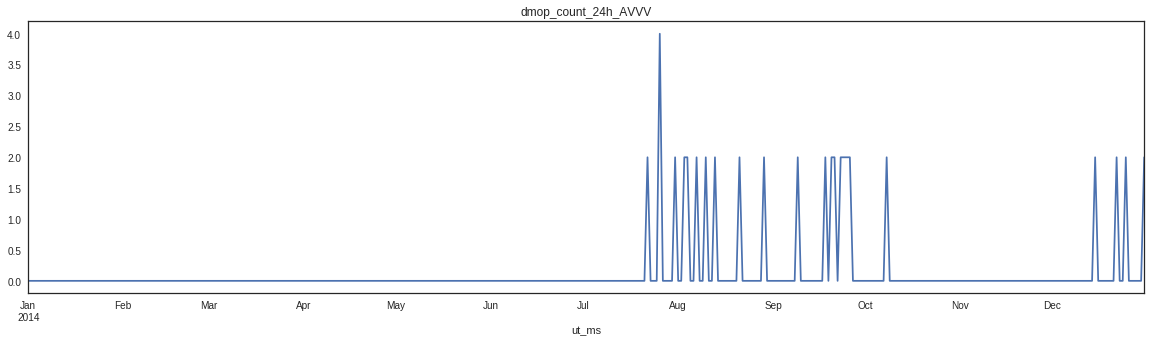

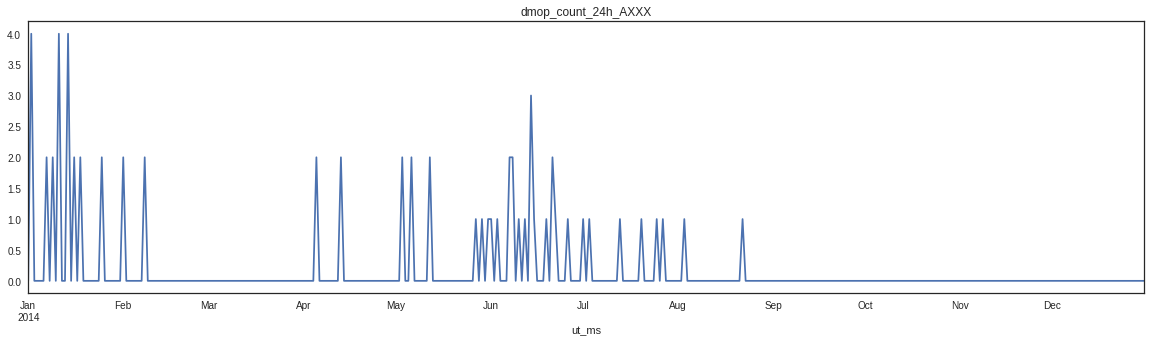

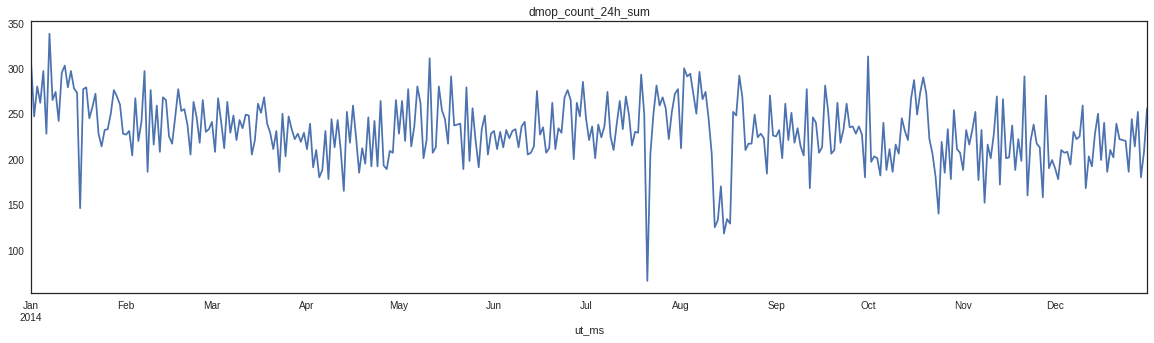

In [92]:
names = dmop_24h_df.columns.values
for i, name in enumerate(names):
    plt.figure(num=i,figsize=(20,5))
    dmop_24h_df[name].plot()
    plt.title(name)

In [93]:
dmop_24h_df.describe()

,dmop_count_24h_AAAA,dmop_count_24h_AACF,dmop_count_24h_AHHH,dmop_count_24h_AMMM,dmop_count_24h_AOOO,dmop_count_24h_APSF,dmop_count_24h_ASSS,dmop_count_24h_ASXX,dmop_count_24h_ATMB,dmop_count_24h_ATTT,dmop_count_24h_AVVV,dmop_count_24h_AXXX,dmop_count_24h_sum
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,14.717808,106.134247,11.632877,32.021918,7.246575,26.860274,11.000000,0.336986,2.709589,17.786301,0.131507,0.175342,230.753425
std,3.401654,20.528486,11.907012,9.702699,7.548344,13.414142,4.524051,1.039800,1.034058,3.099686,0.518047,0.585489,35.329136
min,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,66.000000
25%,13.000000,97.000000,0.000000,24.000000,0.000000,17.000000,8.000000,0.000000,2.000000,16.000000,0.000000,0.000000,210.000000
50%,15.000000,107.000000,10.000000,33.000000,7.000000,26.000000,12.000000,0.000000,3.000000,18.000000,0.000000,0.000000,230.000000
75%,17.000000,118.000000,21.000000,40.000000,12.000000,36.000000,15.000000,0.000000,3.000000,20.000000,0.000000,0.000000,254.000000
max,23.000000,150.000000,61.000000,50.000000,29.000000,71.000000,25.000000,6.000000,6.000000,28.000000,4.000000,4.000000,338.000000


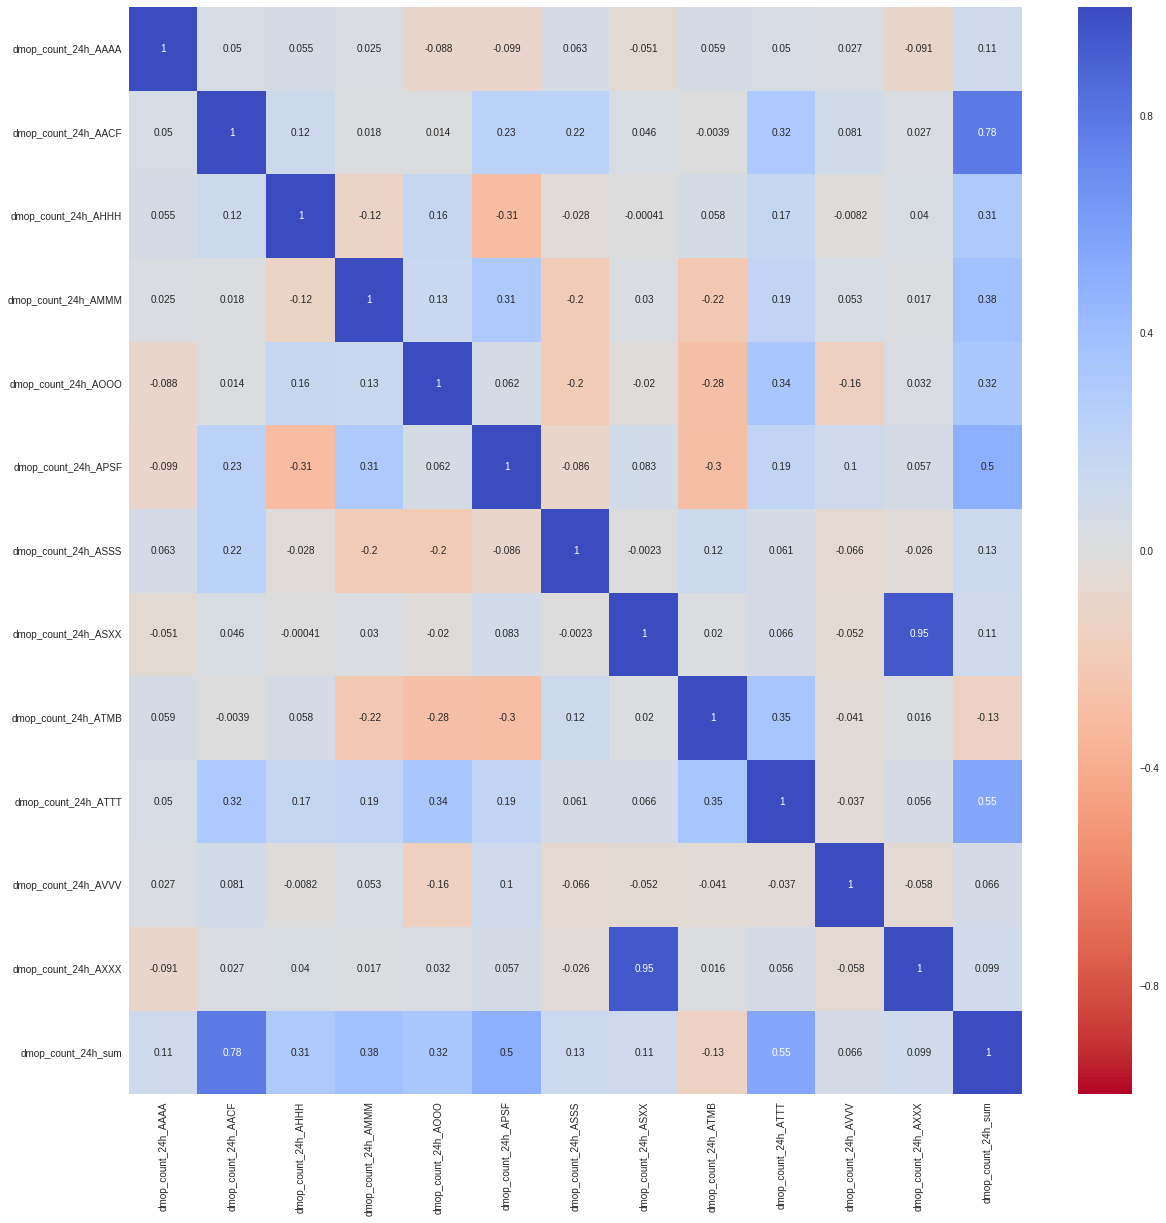

In [94]:
#Correlation map for commands
plt.figure(figsize=(20,20))
sns.heatmap(dmop_24h_df.corr(), cmap="coolwarm_r", annot=True)

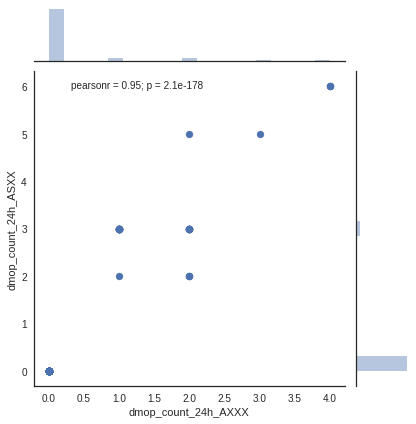

In [95]:
sns.jointplot(x='dmop_count_24h_AXXX',y='dmop_count_24h_ASXX',data=dmop_24h_df)

In [96]:
saaf_raw.shape

(498806, 4)

In [97]:
power.shape

(980322, 33)

In [98]:
dmop_raw.shape

(94060, 1)

In [99]:
dmop_raw.head()

,subsystem
ut_ms,
1388536106000,AAAAF40C0
1388538814000,AACFE91A
1388538822000,ATTTF321P
1388538877000,AACFM06A
1388538878000,AACFE03A


In [100]:
power.head()

,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
ut_ms,,,,,,,,,,,,,,,,,,,,,
1388534410697,0.001457,0.001474,0.177440,0.005015,0.000714,0.006247,0.000554,0.001827,0.424989,0.005028,...,0.000996,0.001474,0.002123,0.005547,0.069760,0.000602,0.000598,0.000714,0.006457,0.003227
1388534442708,0.001821,0.001474,0.177440,0.006019,0.000714,0.001001,0.000554,0.001827,0.430256,0.005028,...,0.000996,0.001474,0.002123,0.005547,0.647788,0.000602,0.000499,0.000714,0.007748,0.003227
1388534474708,0.001821,0.001474,0.172173,0.006019,0.000714,0.001001,0.000554,0.001827,0.430256,0.005028,...,0.000996,0.001474,0.002389,0.005547,0.647788,0.000501,0.000499,0.000714,0.007748,0.003227
1388534506695,0.001821,0.001474,0.177440,0.006019,0.000714,0.001001,0.000554,0.001827,0.430256,0.005028,...,0.000996,0.001474,0.002389,0.005547,0.647788,0.000501,0.000499,0.000714,0.007748,0.003227
1388534538697,0.001821,0.001474,0.177440,0.005015,0.000857,0.001001,0.000554,0.001827,0.430256,0.005028,...,0.000996,0.001474,0.002389,0.005547,0.627856,0.000501,0.000499,0.000714,0.007748,0.003227


In [101]:
evtf_raw = pd.read_csv("../data/hackathon/context--2014-01-01_2015-01-01--evtf.csv", index_col=0)

In [102]:
evtf_raw.head()

,description
ut_ms,
1388534589000,4000_KM_ASCEND
1388537098000,CEB_AOS_03_/_RTLT_01362
1388537772000,MAD_AOS_05_/_RTLT_01362
1388537801000,CEB_AOS_05_/_RTLT_01362
1388538090000,MAD_AOS_06_/_RTLT_01362


In [103]:
ltdata_raw  = pd.read_csv("../data/hackathon/context--2014-01-01_2015-01-01--ltdata.csv", index_col=0)

In [104]:
ltdata_raw.head()

,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min
ut_ms,,,,,,
1388534400000,2.492364e+08,2.041964e+08,36.165104,492.128446,0.0,52.016667
1388620800000,2.492387e+08,2.027023e+08,36.170689,492.119513,0.0,51.900000
1388707200000,2.492395e+08,2.012069e+08,36.172424,492.116468,0.0,51.733333
1388793600000,2.492387e+08,1.997103e+08,36.170228,492.119311,0.0,51.600000
1388880000000,2.492365e+08,1.982128e+08,36.164022,492.128042,0.0,51.383333


In [105]:
ltdata_df = load_dataframe("../data/hackathon/context--2014-01-01_2015-01-01--ltdata.csv")

In [106]:
ltdata_df.head()

,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min
ut_ms,,,,,,
2014-01-01,2.492364e+08,2.041964e+08,36.165104,492.128446,0.0,52.016667
2014-01-02,2.492387e+08,2.027023e+08,36.170689,492.119513,0.0,51.900000
2014-01-03,2.492395e+08,2.012069e+08,36.172424,492.116468,0.0,51.733333
2014-01-04,2.492387e+08,1.997103e+08,36.170228,492.119311,0.0,51.600000
2014-01-05,2.492365e+08,1.982128e+08,36.164022,492.128042,0.0,51.383333


In [107]:
names = ltdata_df.columns.values

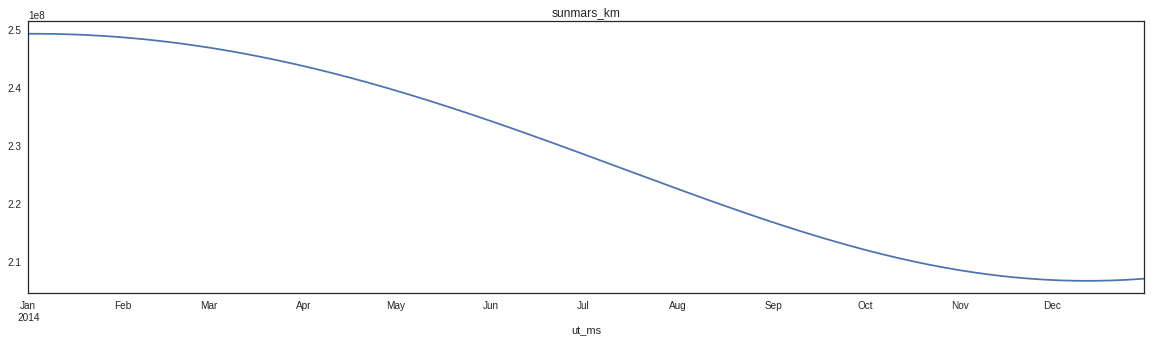

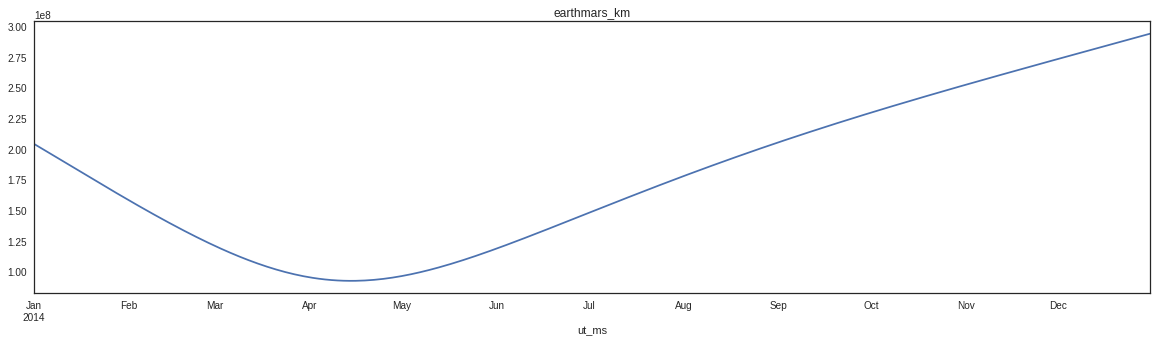

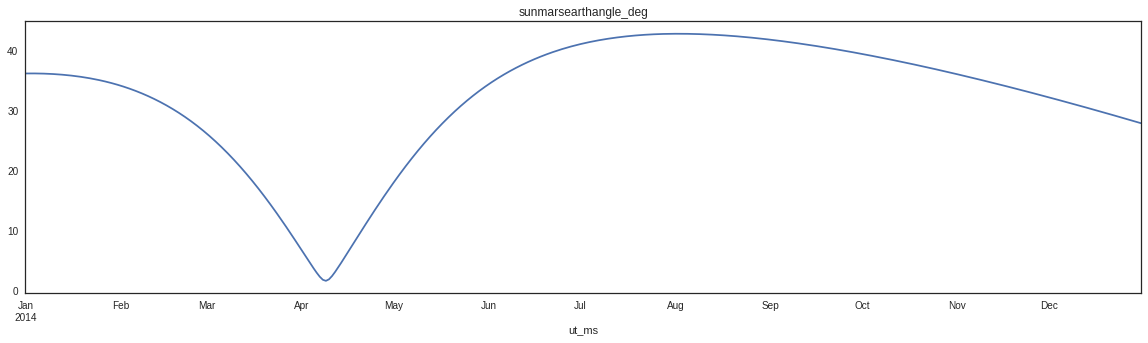

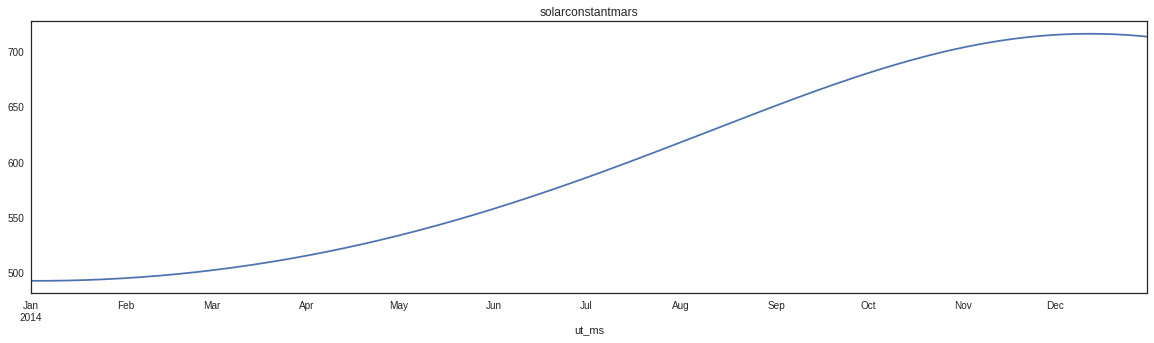

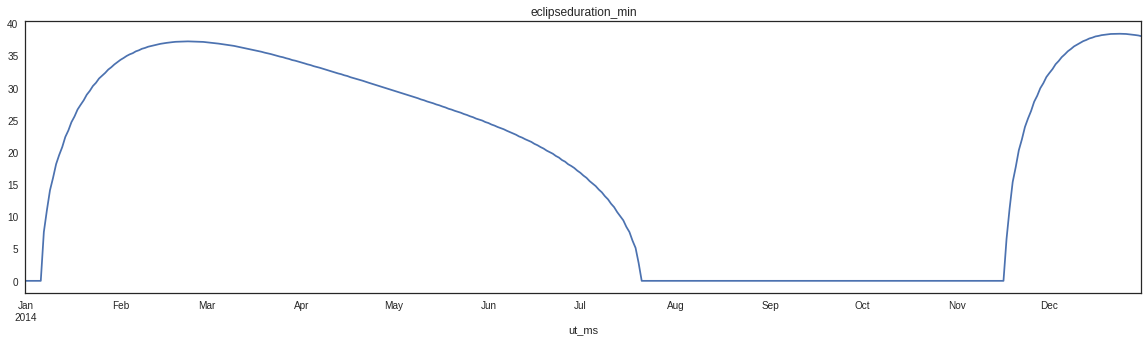

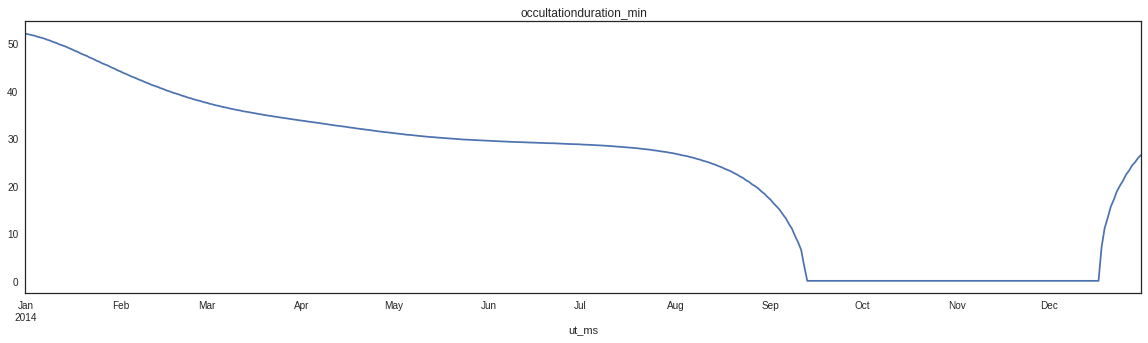

In [108]:
for i, name in enumerate(names):
    plt.figure(num=i, figsize=(20,5))
    ltdata_df[name].plot()
    plt.title(name)

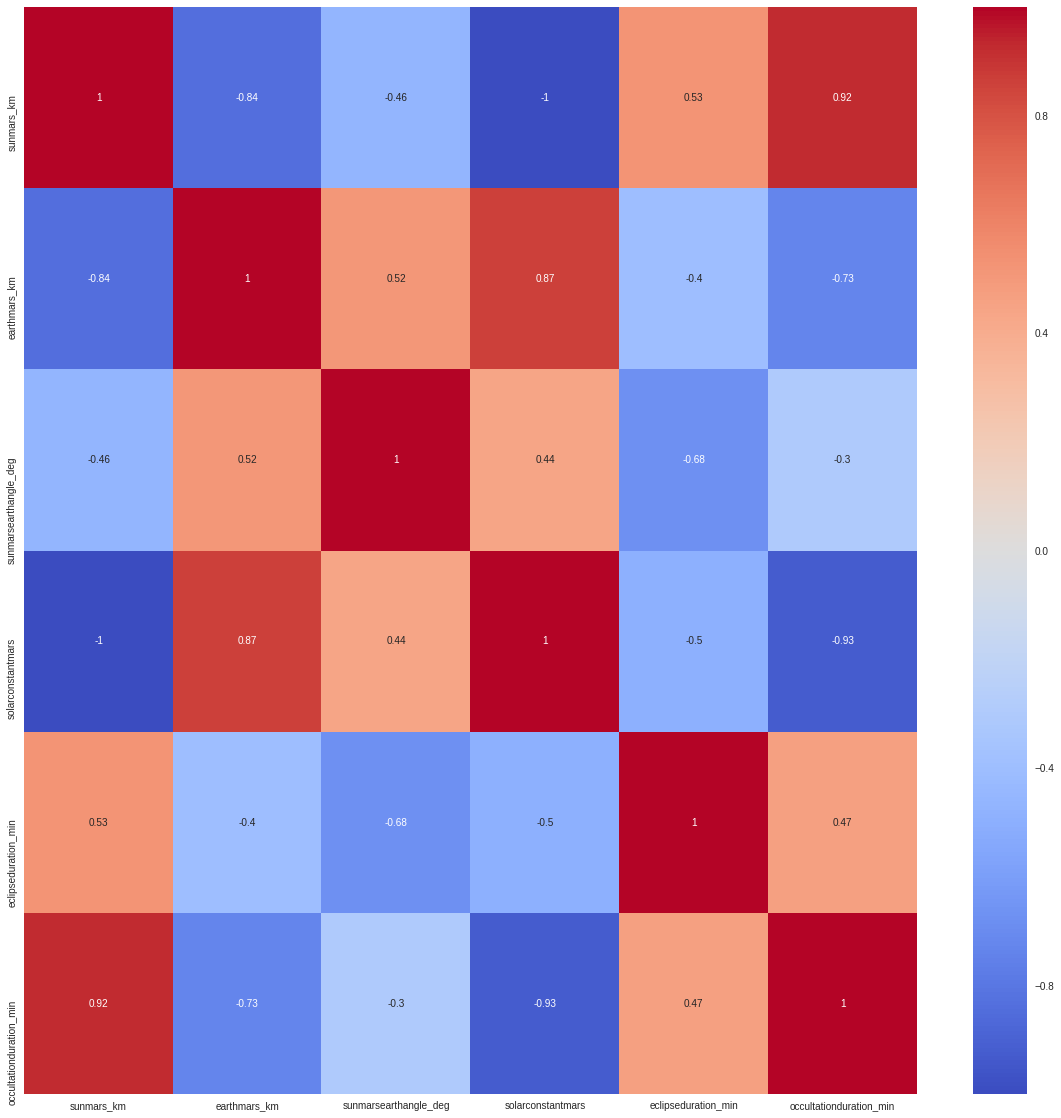

In [109]:
plt.figure(figsize=(20,20))
sns.heatmap(ltdata_df.corr(), cmap='coolwarm', annot=True)

In [110]:
power.shape

(980322, 33)

In [111]:
saaf_raw.shape

(498806, 4)